In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

image = io.imread("D:/Dropbox/Dropbox/devils_kitchen/Thesis/DJI_0095_CLIP.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
1644300


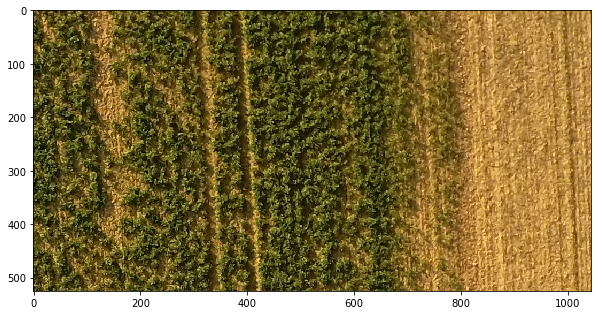

In [3]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image);

# Superpixel, Words

In [4]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [5]:
#SLIC
segments_slic = slic(image, n_segments=400, compactness=30, sigma=1)
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))

SLIC number of segments: 391


In [6]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mark_boundaries(image, segments_slic));


In [7]:
#IMPORTS
import sys
sys.path.append("H:/Geography/MASTERARBEIT/src/repoBackup")
sys.path.append("H:/Geography/MASTERARBEIT/src/repoBackup/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


In [8]:
# settings for LBP
METHOD = 'nilbp'
radius = 1
n_points = 8 * radius

lbp = lbp.local_binary_pattern(im_gray, None, n_points, radius, METHOD)


In [9]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

### Graph:

In [10]:
import networkx as nx

#from bowrag import BOW_RAG, cumu_diff
import bow_rag
import bow_diff

In [11]:
import lbp_bins

In [12]:
BINS = lbp_bins.lbp_bins(n_points, "default")

#BINS

In [13]:
Graph = bow_rag.BOW_RAG(seg_img = segments_slic, tex_img = lbp, color_image = image, tex_bins=BINS, color_bins = 100)

In [14]:
Graph.node[151]

{'color': [<bow_container.hist at 0xb3403c8>,
 'labels': [151],
 'pixel_count': 1334,
 'tex': <bow_container.hist at 0xb340470>}

In [15]:
from bow_diff import config_weighting

wf_both_g = config_weighting(mode="graph")
wf_both_m = config_weighting(mode="merge")

#print(wf_both_m)

In [16]:
Graph.calc_edge_weights(wf_both_g)

In [17]:
Graph.calc_edge_weight_stats()

In [18]:
Graph.edge_weight_stats


{'max': 0.4697247325638943,
 'mean': 0.23996431780469135,
 'median': 0.2317222003460247,
 'min': 0.16277804602079443,
 'stdev': 0.041482669764128524}

(array([  83.,  370.,  343.,  156.,   78.,   36.,   24.,    3.,    2.,    1.]),
 array([ 0.16277805,  0.19347271,  0.22416738,  0.25486205,  0.28555672,
         0.31625139,  0.34694606,  0.37764073,  0.4083354 ,  0.43903006,
         0.46972473]),
 <a list of 10 Patch objects>)

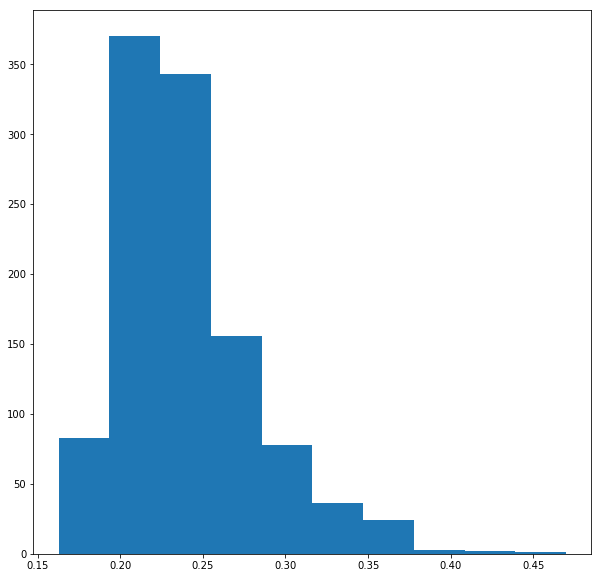

In [19]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.hist(Graph.get_edge_weight_list())

## Merging:

In [20]:
from skimage.future import graph
from skimage import segmentation, color

In [21]:
th = Graph.get_edge_weight_percentile(20, as_threshhold=True)
print(th)

0.206137788909


In [22]:
import bow_rag

In [23]:
merged = graph.merge_hierarchical(segments_slic, Graph, thresh=th, rag_copy=True,
                                   in_place_merge=True,
                                   merge_func=bow_rag._bow_merge_simple,
                                   weight_func=wf_both_m)



In [24]:
out = color.label2rgb(merged, image, kind='avg')
out = segmentation.mark_boundaries(out, merged, (0, 0, 0))

## Output:

### Original Image

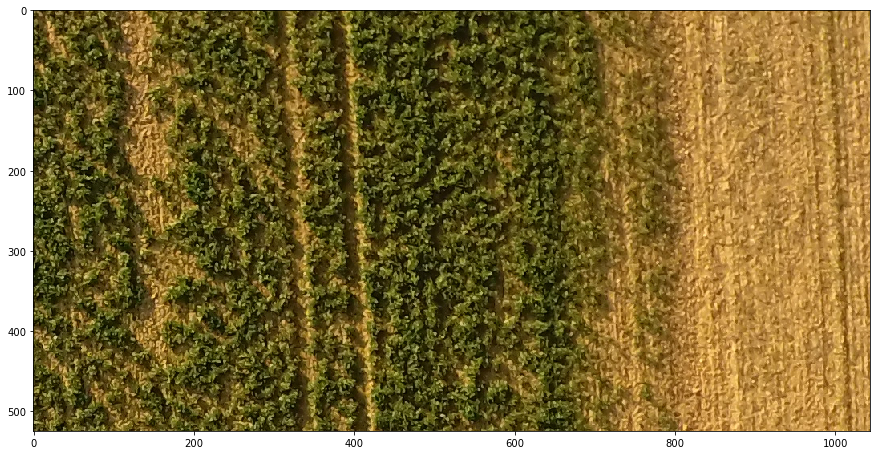

In [58]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(image);

### Segmented Image

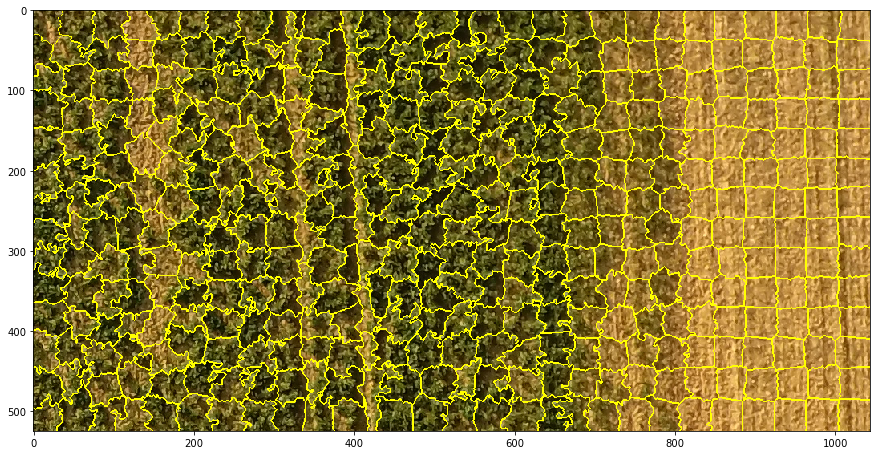

In [25]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(mark_boundaries(image, segments_slic));

### Local Binary Pattern

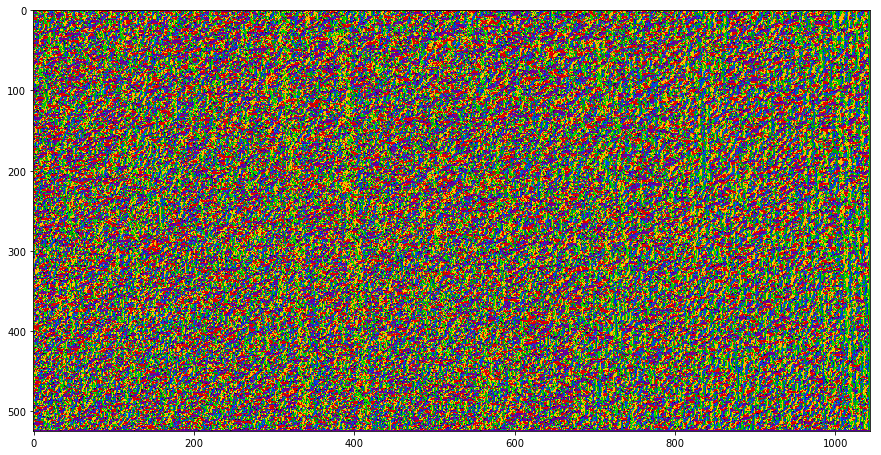

In [62]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

### Merged Result

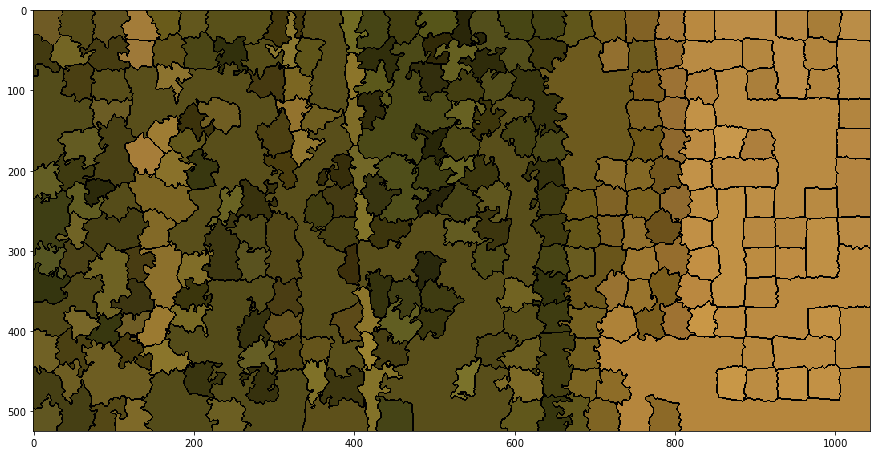

In [26]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(out);